In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import numpy as np

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### 최종 데이터프레임 불러오기 (최종전연령대.pkl)

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종.pkl')
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.16,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.14,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.06,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.16,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.15,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.20,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.00,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,3.86,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.14,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2


In [6]:
# 안쓰는 변수들 제거
# 재방문의사, 타인추천의도 제거
df.drop(['카드_평일_이용건수', '카드_여행사_이용건수', '재방문의도', '타인추천의도'], axis=1, inplace=True)

##### 결측치 처리

In [7]:
df[df['여행객수'].isnull() == True]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,숙박시설,식당및음식,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop([66], axis=0, inplace=True)

In [9]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_20대_이용건수      0
카드_30대_이용건수      0
카드_40대_이용건수      0
카드_50대_이용건수      0
카드_60대_이용건수      0
카드_관광쇼핑_이용건수    12
카드_교통_이용건수      18
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             0
교통               0
숙박시설             1
식당및음식            0
쇼핑               0
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           0
관광지물가            0
관광지혼잡도           0
평균인당비용           0
여행객수             0
dtype: int64

In [10]:
# 이용건수는 0으로
df['카드_관광쇼핑_이용건수'] = df['카드_관광쇼핑_이용건수'].fillna(0)
df['카드_교통_이용건수'] = df['카드_교통_이용건수'].fillna(0)

In [11]:
# 만족도는 평균값으로
df['숙박시설'] = df['숙박시설'].fillna(df['숙박시설'].mean())

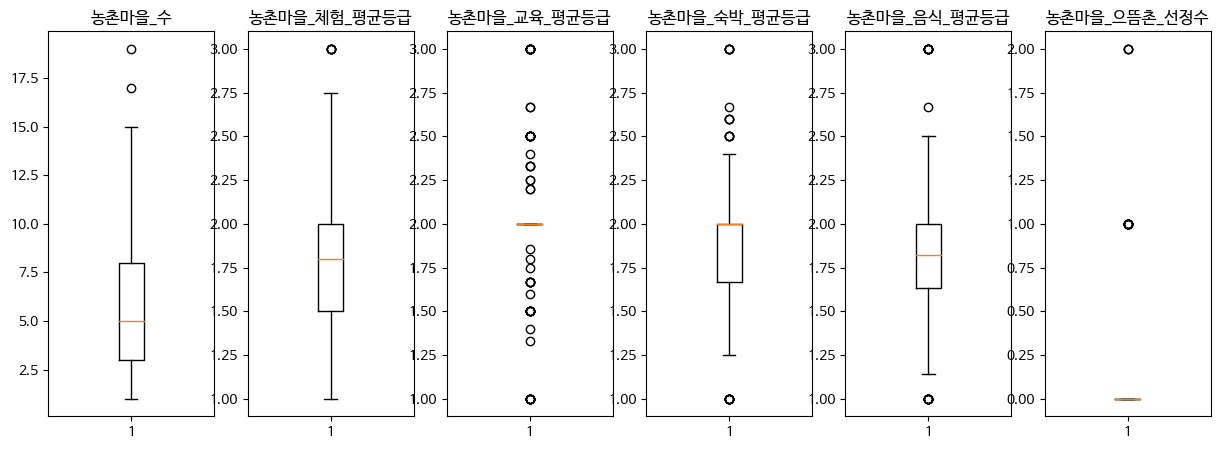

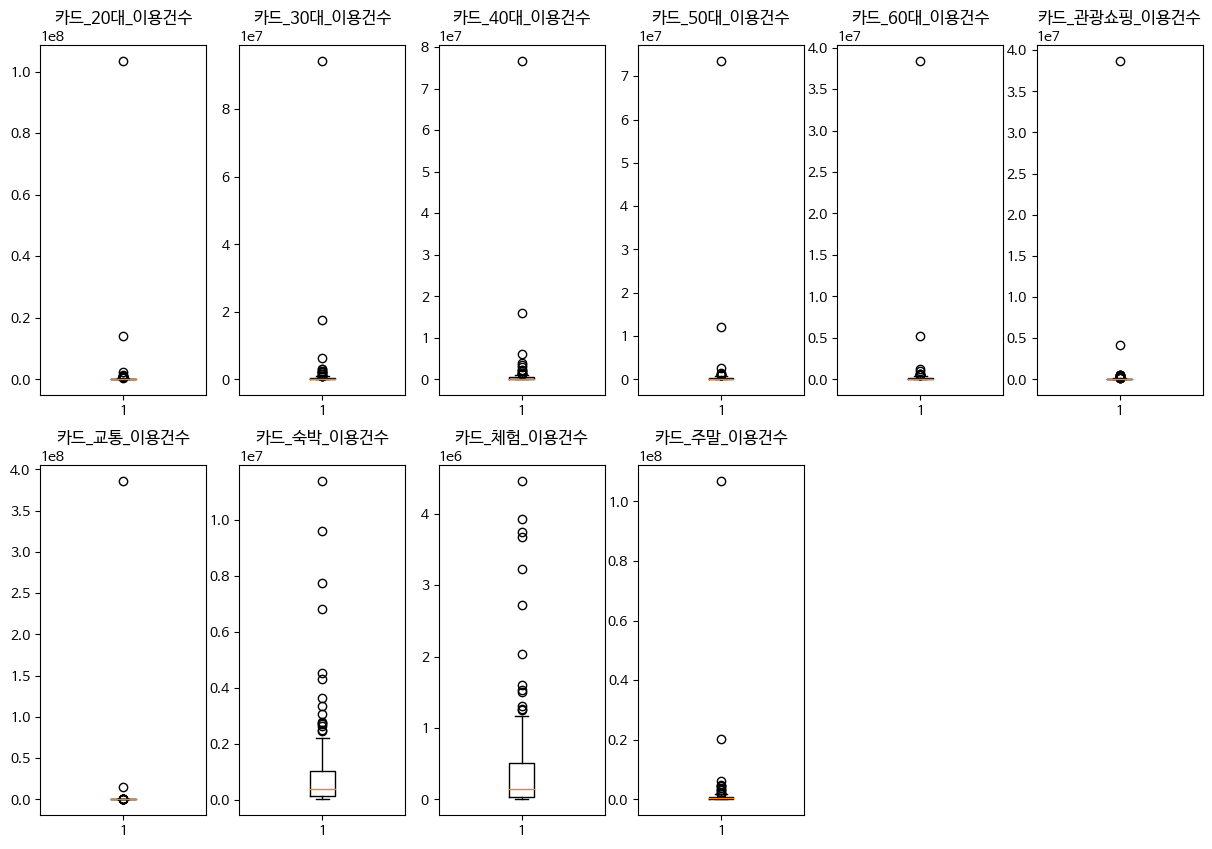

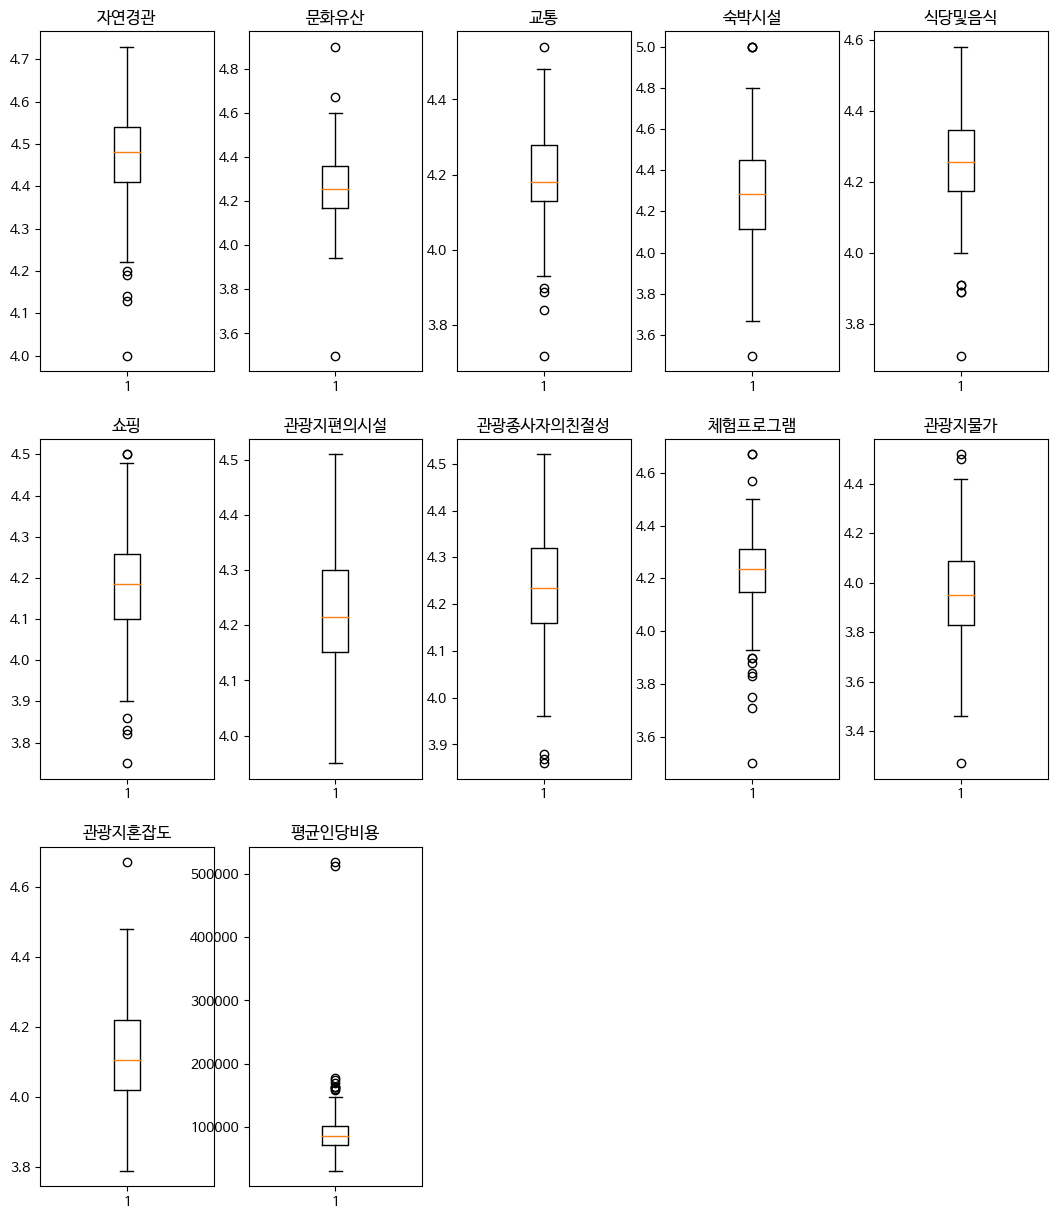

In [12]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,17):
  plt.subplot(2,6,i-6)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(17,29):
  plt.subplot(3,5,i-16)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

In [13]:
# 카드 이용 수와 평균인당 비용 단위가 크기 때문에 로그변환

##### 카드 관련 변수 로그 변환

In [14]:
# 카드 관련 변수 로그 변환
df_log = df.copy()
df_log.iloc[:, 7:17] = np.log1p(df_log.iloc[:, 7:17])
# 평균인당 비용 로그변환
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

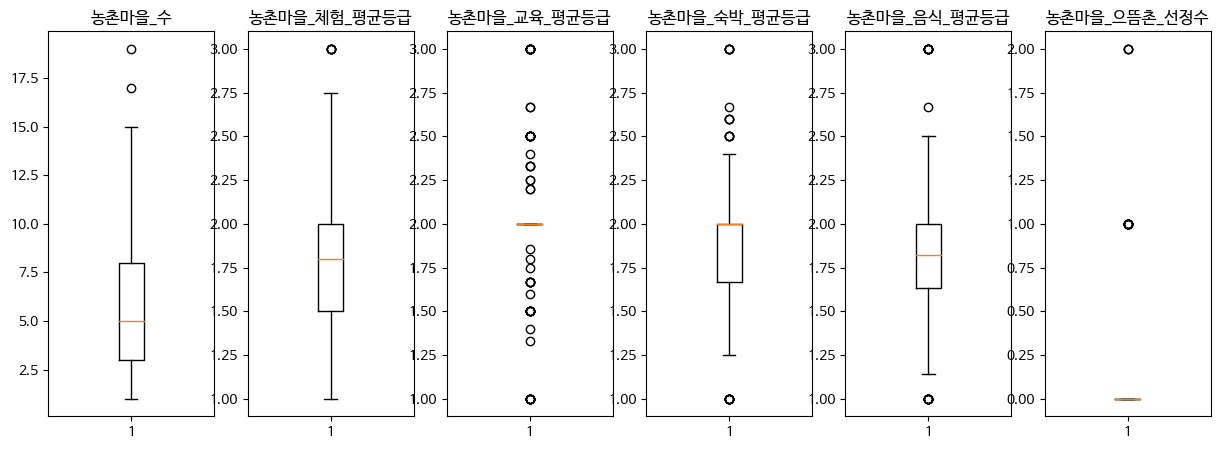

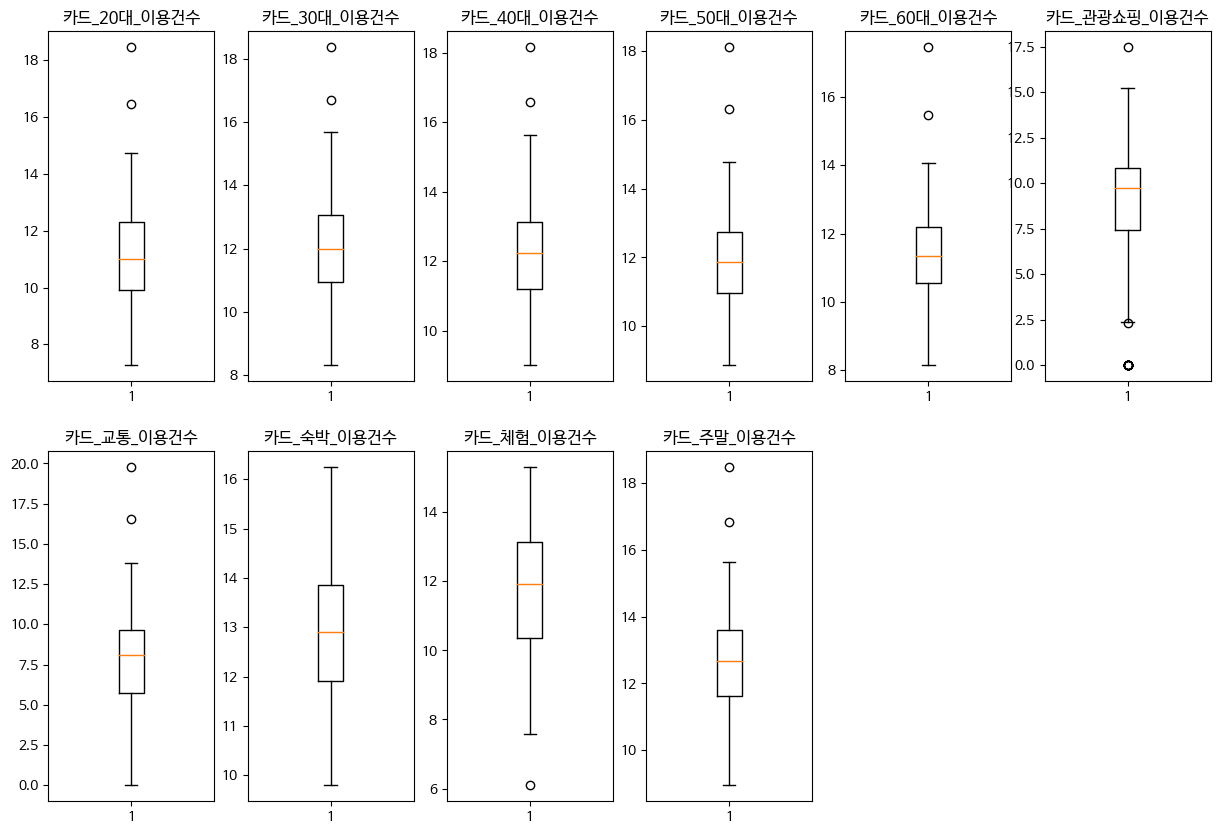

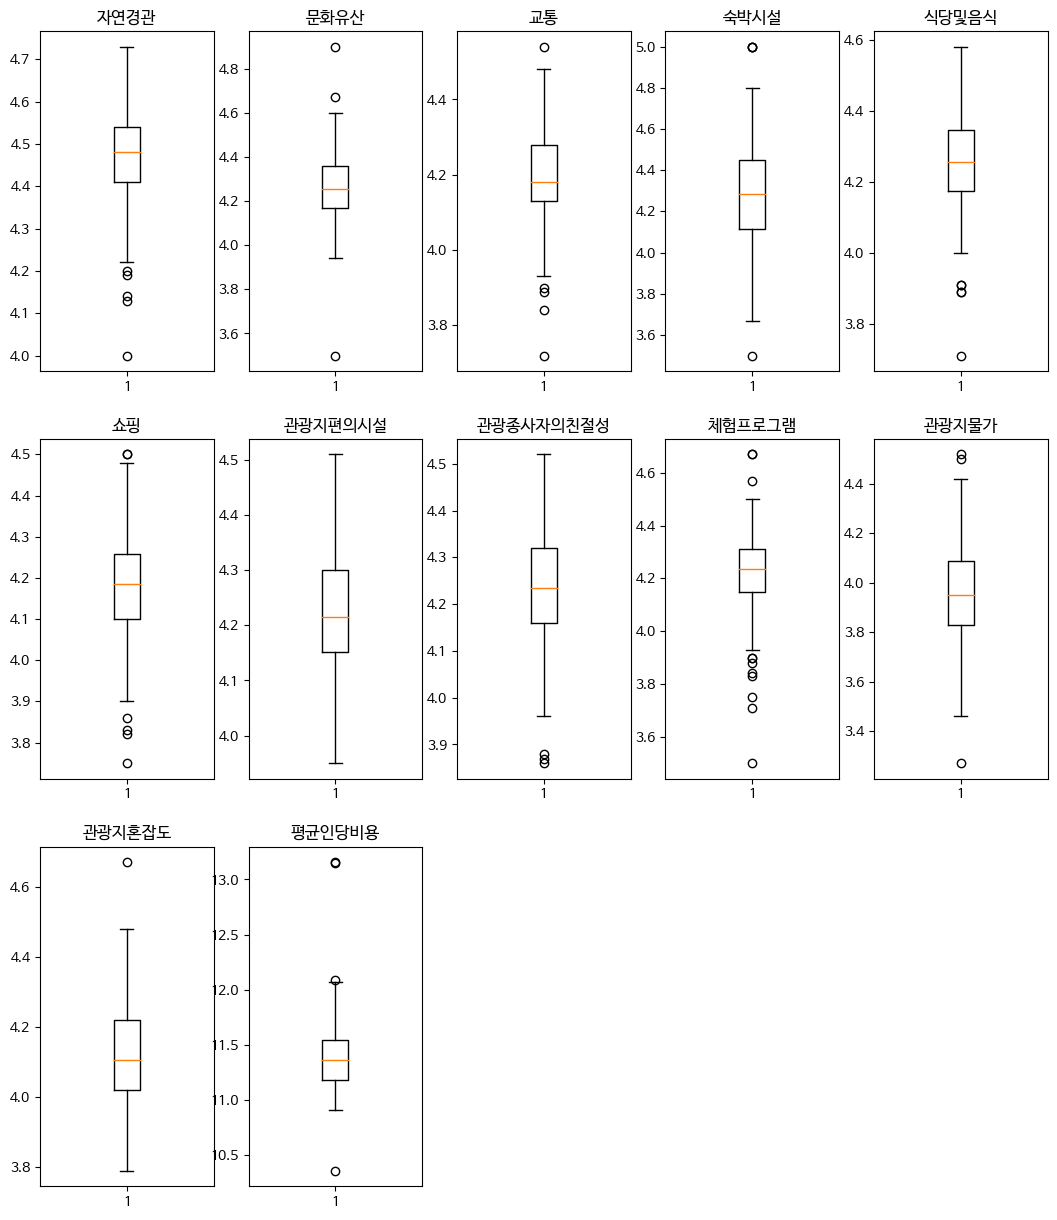

In [15]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,17):
  plt.subplot(2,6,i-6)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(17,29):
  plt.subplot(3,5,i-16)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

In [16]:
df_log

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,숙박시설,식당및음식,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,13.953078,14.264825,14.176593,...,4.29,4.24,4.16,4.19,4.19,4.26,3.80,3.94,11.985893,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,12.374245,13.825037,14.042681,...,4.16,4.24,4.14,4.19,4.18,4.14,3.81,4.01,12.004733,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,11.418659,12.006755,12.468537,...,4.30,4.22,4.06,4.22,4.08,3.93,3.78,4.13,11.745370,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,11.876999,13.307220,13.524201,...,4.29,4.30,4.16,4.32,4.23,4.23,3.88,4.15,11.847181,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,13.084853,13.931219,14.112003,...,4.34,4.24,4.15,4.18,4.16,4.23,3.86,4.02,12.069823,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,12.486386,13.531874,13.393463,...,4.49,4.21,4.20,4.24,4.23,4.24,4.01,4.12,11.604355,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,10.943782,12.678374,12.455695,...,4.14,4.20,4.00,4.36,4.29,4.33,3.71,4.27,11.310479,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,10.646543,11.228917,11.513765,...,4.25,4.10,3.86,4.07,4.04,4.29,3.93,3.97,11.181570,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,13.588602,13.625485,13.607917,...,4.25,4.18,4.14,4.13,4.21,4.16,3.88,4.02,11.302402,986686.2


### 클러스터링

#### T-SNE 2차원으로 축소

In [17]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# 변수 스케일링
scaler = StandardScaler()
df_scaled = df_log.copy()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [18]:
tsne_np = TSNE(n_components = 2, random_state=10).fit_transform(df_scaled.iloc[:, 1:-1])

In [19]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,5.257817,2.089096
1,2.227299,3.256883
2,3.151131,0.703091
3,1.321634,1.192018
4,3.949265,2.476752
...,...,...
137,1.548402,2.120180
138,-1.759137,-1.799139
139,5.472894,-3.007716
140,2.740193,4.452210


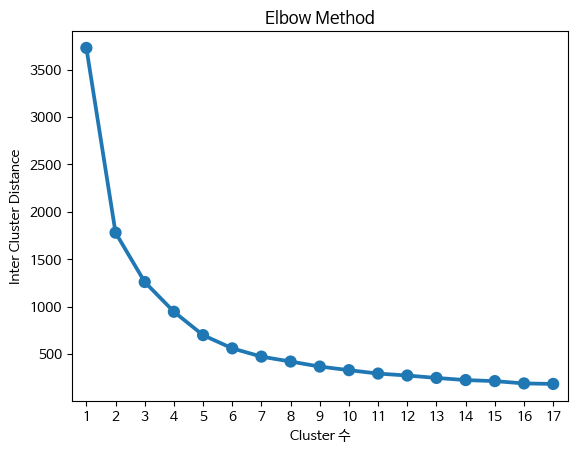

In [20]:
# Elbow method로 적정 클러스터 수 찾기
inertia = {}
for k in range(1,18):
    kmeans = KMeans(n_clusters = k, random_state=10).fit(tsne_df)
    inertia[k] = kmeans.inertia_
plt.title('Elbow Method')
plt.xlabel('Cluster 수')
plt.ylabel('Inter Cluster Distance')
sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.show()

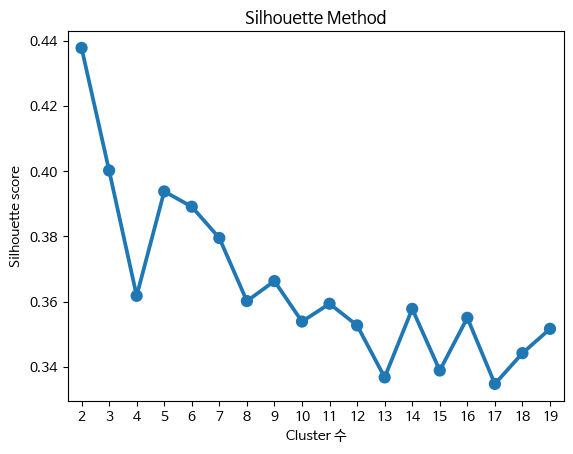

In [21]:
# 실루엣계수로 확인 (1에 가까울수록 군집화가 잘되는 것)
from sklearn.metrics import silhouette_score

score = {}
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(tsne_df)
    labels = kmeans.labels_
    score[k] = silhouette_score(tsne_df, labels, metric='euclidean')

plt.title('Silhouette Method')
plt.xlabel('Cluster 수')
plt.ylabel('Silhouette score')
sns.pointplot(x=list(score.keys()), y=list(score.values()))
plt.show()

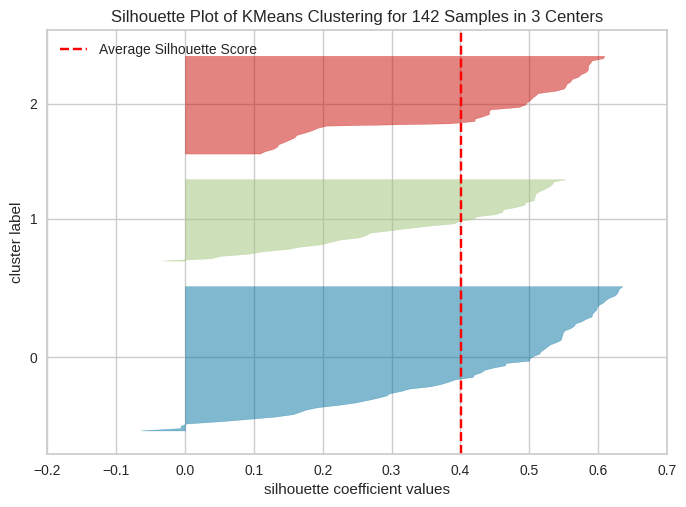

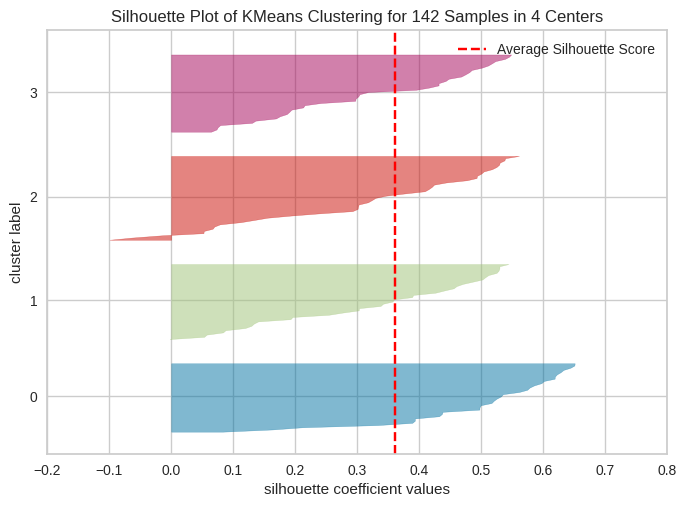

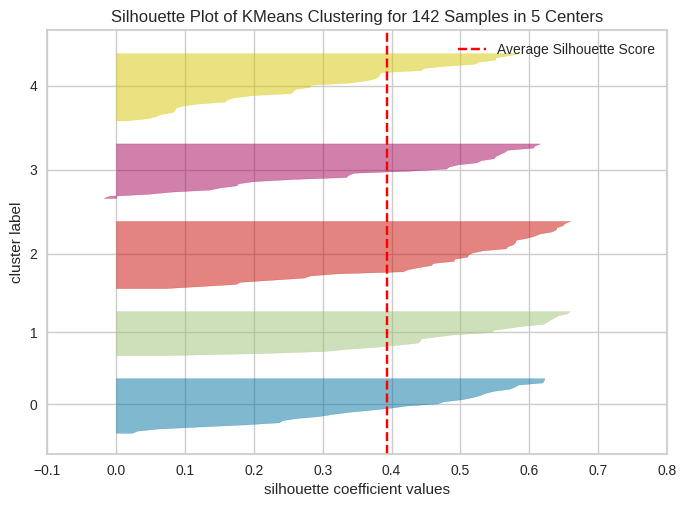

In [22]:
# 군집 개수별 실루엣 계수 확인
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(3,6):
  kmeans = KMeans(n_clusters=i, random_state=10)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(tsne_df)
  visualizer.show()

In [23]:
# 군집 5개 선택

In [24]:
# 실루엣 변수 값
kmeans = KMeans(n_clusters=5, random_state=10)
kmeans_fit = kmeans.fit(tsne_df)
labels=kmeans_fit.labels_
centers=kmeans_fit.cluster_centers_
silhouette_score(tsne_df, labels, metric='euclidean')

0.3938409

In [25]:
df_kmeans = df_scaled.copy()
df_kmeans['cluster'] = labels

In [26]:
df_kmeans['cluster'].value_counts()

2    33
4    33
3    27
0    27
1    22
Name: cluster, dtype: int64

##### 결과 시각화

In [27]:
시군구 = gpd.read_file('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/SIG_202302/sig.shp', encoding='cp949')

시군구_코드 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/시군구_코드_dict.pkl')

In [28]:
df_cluster_show = df_kmeans.copy()
df_cluster_show['관광지역_시군구_코드'] = df_cluster_show['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df_cluster_show = gpd.GeoDataFrame(pd.merge(df_cluster_show, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))

<Figure size 1500x2000 with 0 Axes>

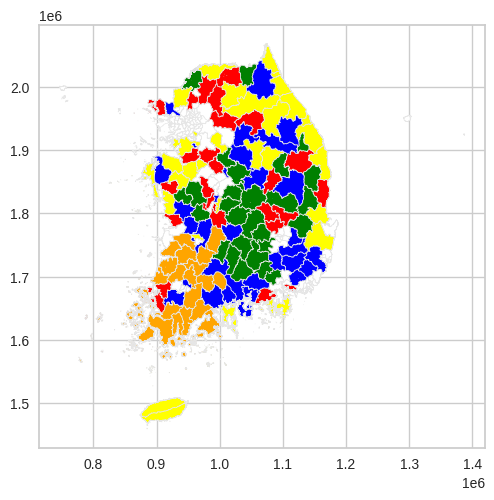

In [29]:
# 군집별 지도에 표시
plt.figure(figsize=(15, 20))
base = 시군구.plot(color='white',linewidth=0.5, edgecolor='0.9')
df_cluster_show[df_cluster_show['cluster'] == 0].plot(color='red',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 1].plot(color='orange',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 2].plot(color='yellow',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 3].plot(color='green',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 4].plot(color='blue',linewidth=0.5, edgecolor='0.9', ax=base)
plt.show()

In [30]:
plt.rc('font', family='NanumBarunGothic')

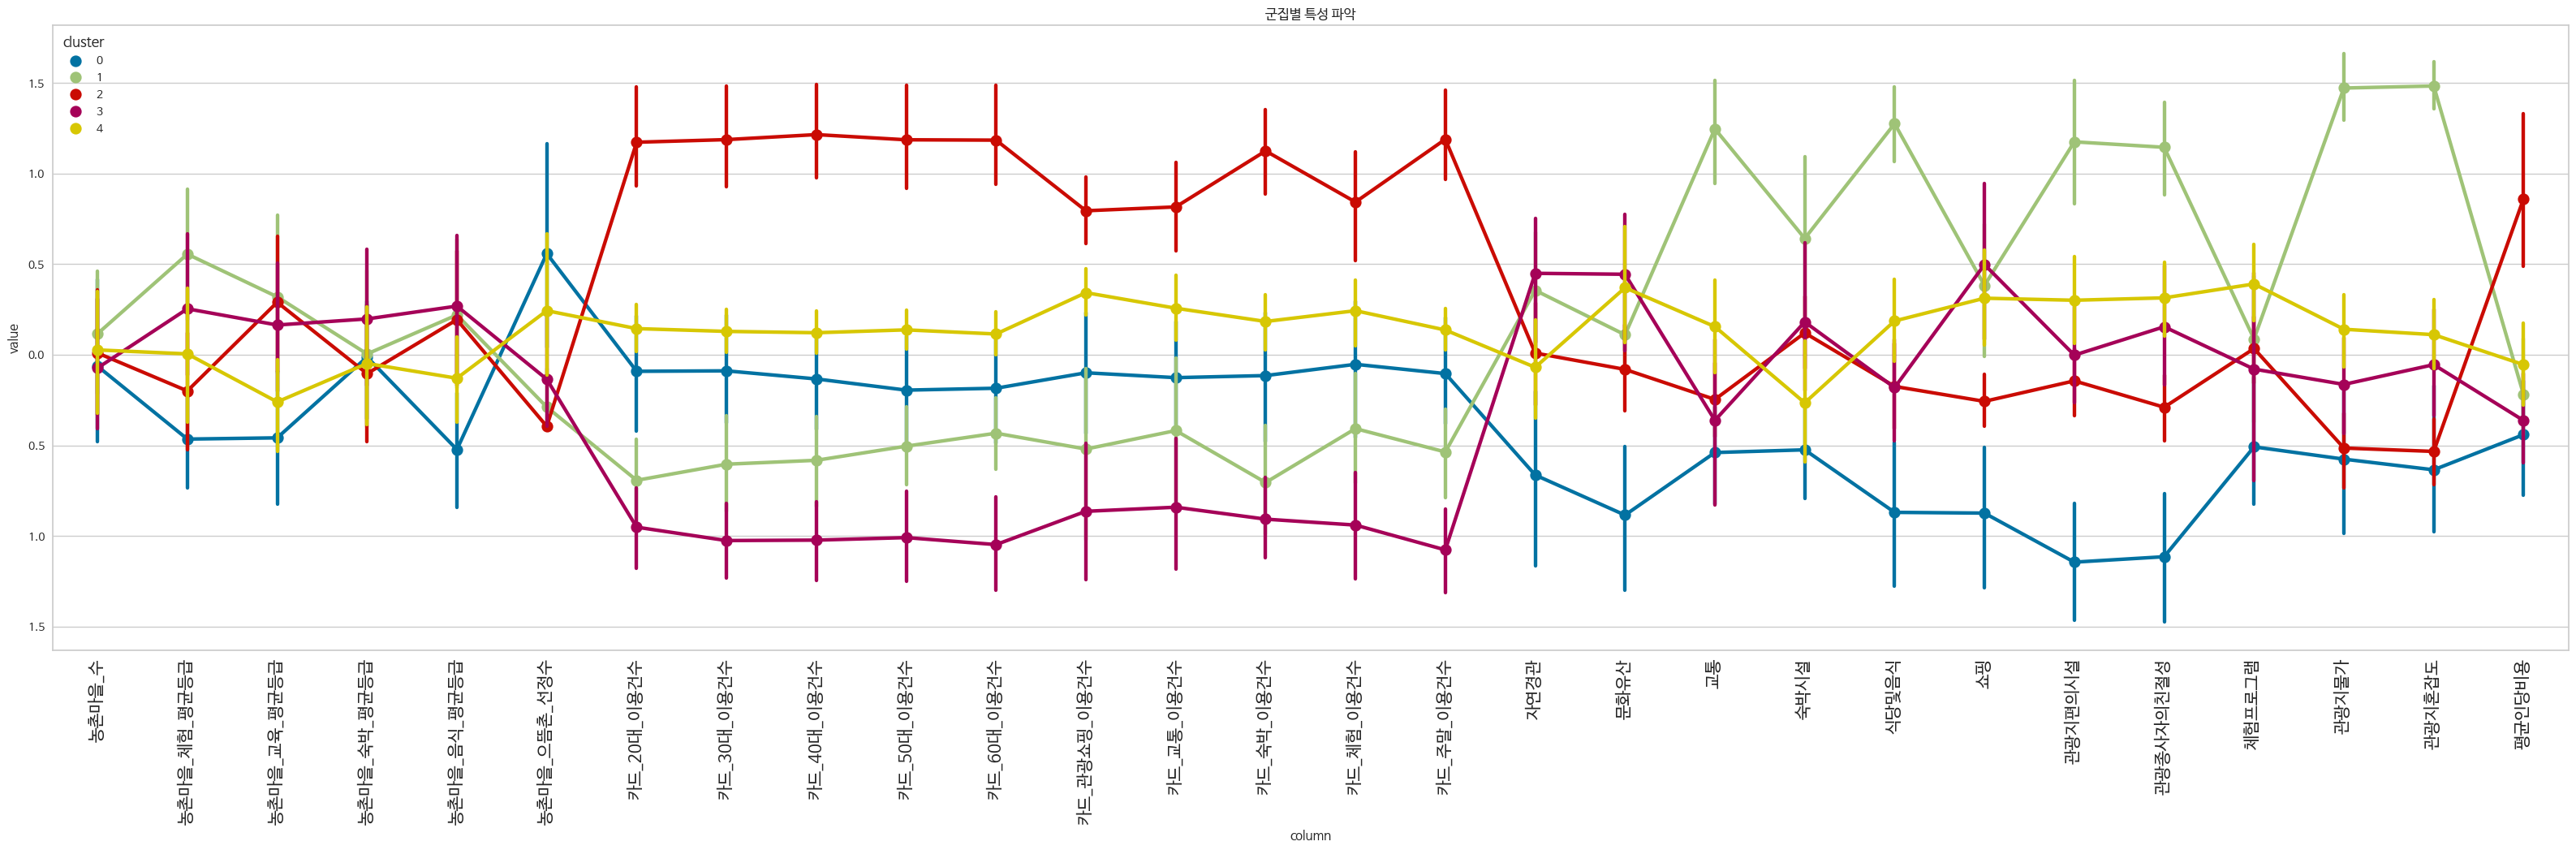

In [31]:
df_snake = df_cluster_show.drop(['관광지역_시군구_코드', 'SIG_KOR_NM', 'geometry'], axis=1)
plt.figure(figsize=(40, 10))
df_melt = pd.melt(df_snake.reset_index(), id_vars=['관광지역_시군구', 'cluster'], value_vars=df_snake.iloc[:,1:-2].columns, var_name='column', value_name='value')
sns.pointplot(data=df_melt, x='column', y='value', hue='cluster')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.show()

In [32]:
df_mean = df_kmeans.groupby(['cluster']).mean()
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,카드_50대_이용건수,...,숙박시설,식당및음식,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.063395,-0.465641,-0.458763,-0.013013,-0.523213,0.557728,-0.091749,-0.089192,-0.133884,-0.195608,...,-0.524871,-0.869831,-0.873929,-1.144478,-1.114588,-0.508495,-0.576274,-0.635173,-0.441083,1.137339e+06
1,0.115271,0.554598,0.319182,0.003917,0.219085,-0.289071,-0.693026,-0.604156,-0.582679,-0.504755,...,0.640965,1.274464,0.381725,1.174041,1.143915,0.086227,1.470768,1.482046,-0.221272,8.120345e+05
2,0.009203,-0.199996,0.289241,-0.104638,0.192952,-0.395413,1.171871,1.186259,1.213939,1.185315,...,0.120039,-0.175086,-0.257550,-0.144461,-0.289979,0.033673,-0.515024,-0.533639,0.860661,2.758561e+06
3,-0.073767,0.252992,0.163660,0.197213,0.267866,-0.135466,-0.951498,-1.025369,-1.022970,-1.009073,...,0.180460,-0.181929,0.496987,-0.002495,0.153915,-0.079551,-0.164145,-0.055074,-0.363202,5.389527e+05
4,0.026174,0.004250,-0.260580,-0.048683,-0.130089,0.242640,0.143712,0.128425,0.121031,0.136836,...,-0.265558,0.185974,0.311475,0.300199,0.313374,0.389971,0.140309,0.110356,-0.055095,9.876757e+05


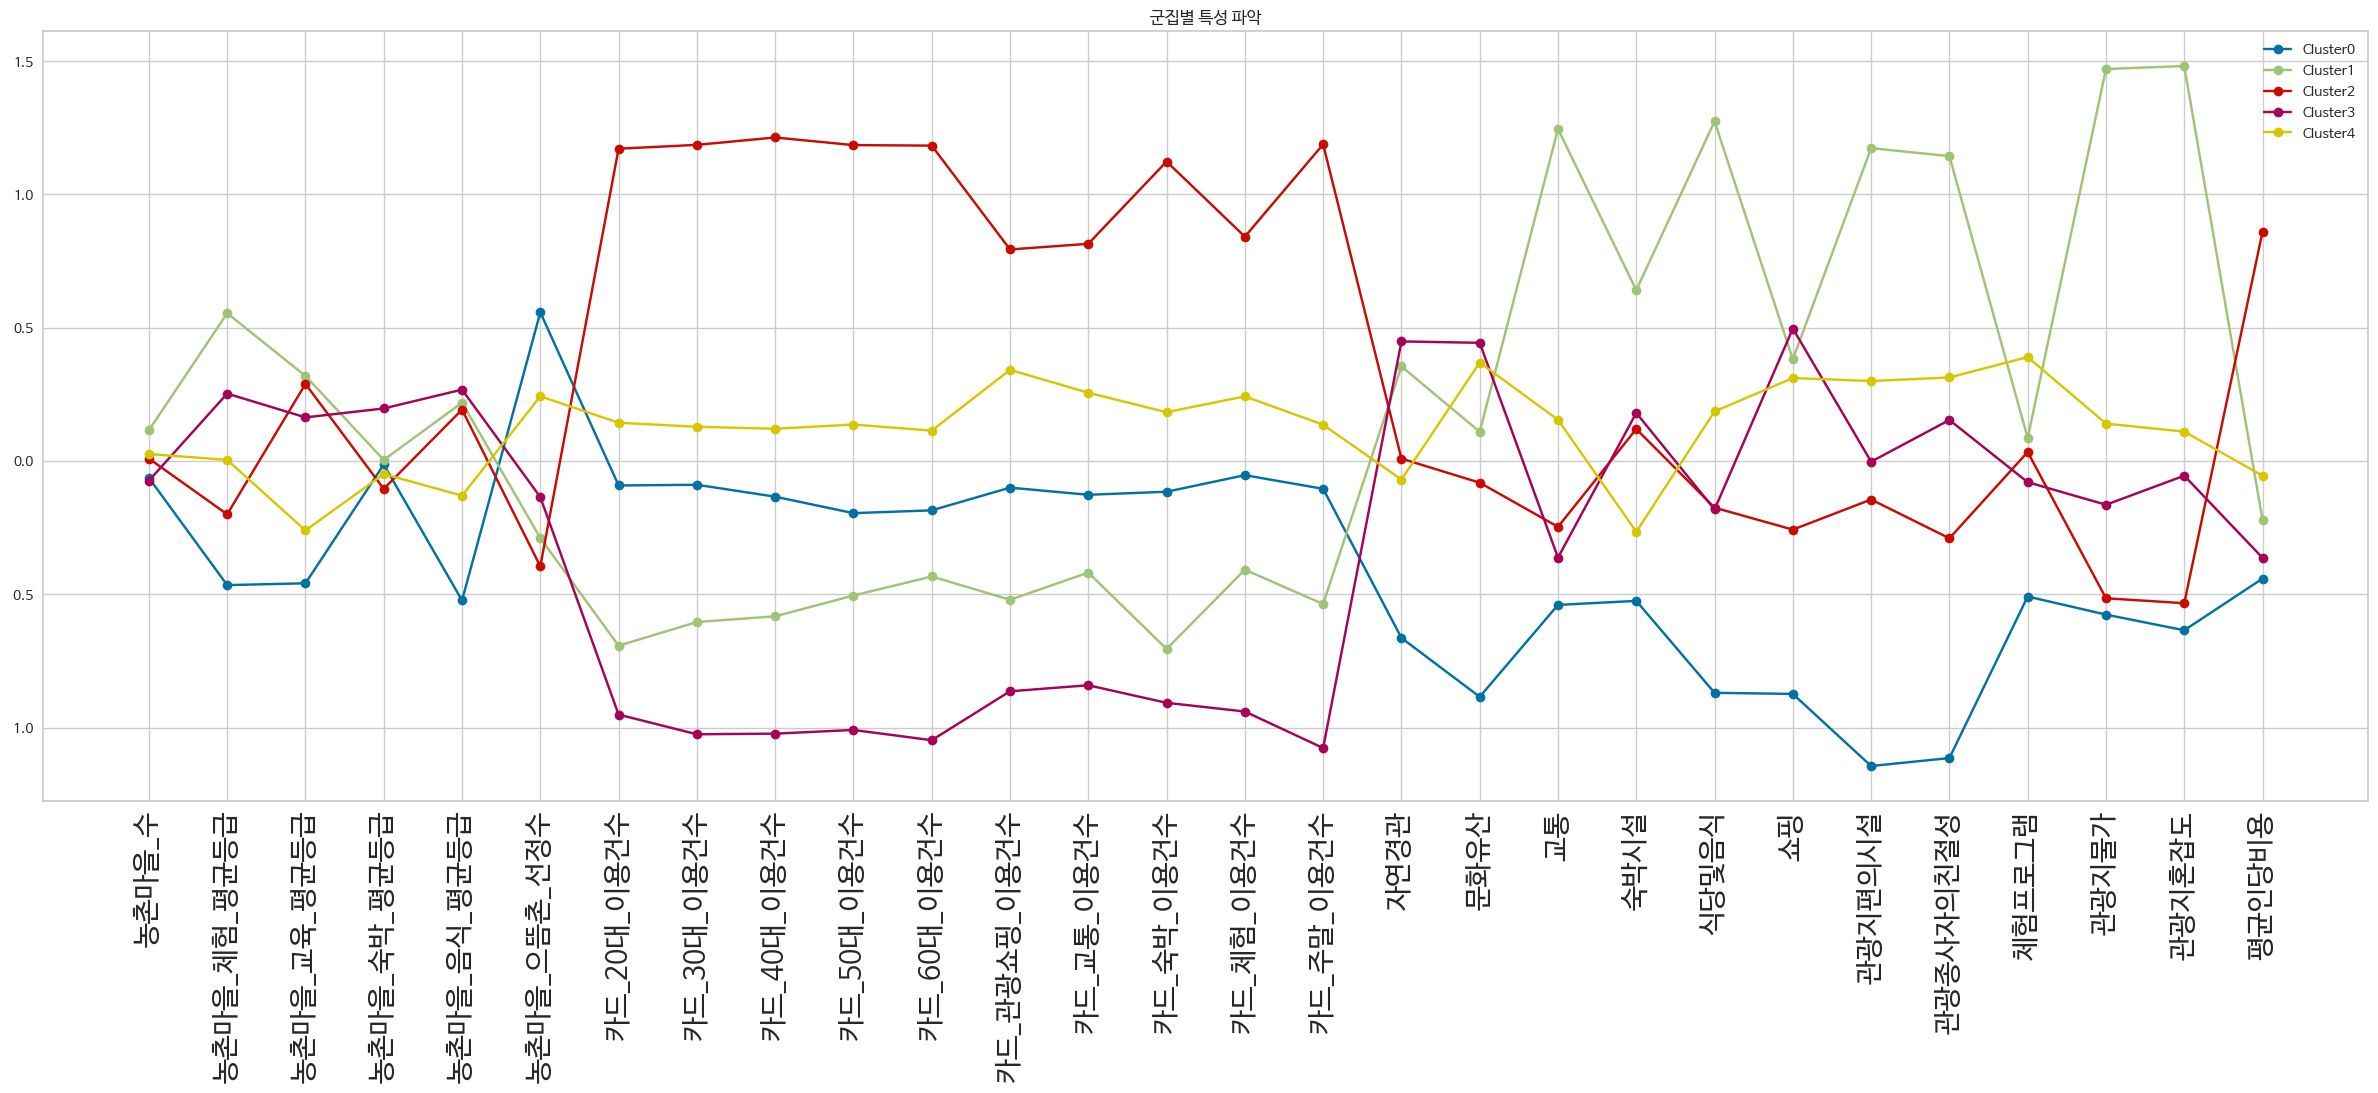

In [33]:
plt.figure(figsize=(30, 10))
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[0,:-1], 'o-', label = 'Cluster0')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[1,:-1], 'o-', label = 'Cluster1')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[2,:-1], 'o-', label = 'Cluster2')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[3,:-1], 'o-', label = 'Cluster3')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[4,:-1], 'o-', label = 'Cluster4')
plt.xticks(rotation=90, fontsize=20)
plt.title("군집별 특성 파악")
plt.legend()
plt.show()

In [34]:
## 최종 데이터프레임에 클러스터 붙이기

In [35]:
df['cluster'] = labels

In [36]:
df.to_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종클러스터링3.pkl')